In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv")

In [3]:
df=df_.copy()

In [4]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [5]:
df.info

<bound method DataFrame.info of        ref company_manufacturer company_location  review_date  \
0     2454                 5150           U.S.A.         2019   
1     2458                 5150           U.S.A.         2019   
2     2454                 5150           U.S.A.         2019   
3     2542                 5150           U.S.A.         2021   
4     2546                 5150           U.S.A.         2021   
...    ...                  ...              ...          ...   
2525  1205               Zotter          Austria         2014   
2526  1996               Zotter          Austria         2017   
2527  2036               Zotter          Austria         2018   
2528  2170               Zotter          Austria         2018   
2529  2170               Zotter          Austria         2018   

     country_of_bean_origin specific_bean_origin_or_bar_name cocoa_percent  \
0                  Tanzania            Kokoa Kamili, batch 1           76%   
1        Dominican Republic    

In [6]:
df.shape

(2530, 10)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ref,2530.0,1429.800791,757.648556,5.0,802.0,1454.00,2079.0,2712.0
review_date,2530.0,2014.374308,3.968267,2006.0,2012.0,2015.00,2018.0,2021.0
rating,2530.0,3.196344,0.445321,1.0,3.0,3.25,3.5,4.0


In [8]:
df.isnull().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [9]:
df.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

In [10]:
df['cocoa_percent']=df['cocoa_percent'].str.replace('%','').astype(float)/100

In [11]:
df.dtypes

ref                                   int64
company_manufacturer                 object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

In [12]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",0.72,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


**YILLARA GÖRE KAKAO YÜZDELERİ**


In [13]:
df_year_cocoa = df.groupby('review_date').aggregate({'cocoa_percent':'mean'}) 

In [ ]:
df_year_cocoa

,cocoa_percent
review_date,
2006,0.704355
2007,0.720822
2008,0.726739
2009,0.704431
2010,0.708136
2011,0.709693
2012,0.715515
2013,0.722787
2014,0.722530


In [14]:
df_year_cocoa=df_year_cocoa.reset_index()

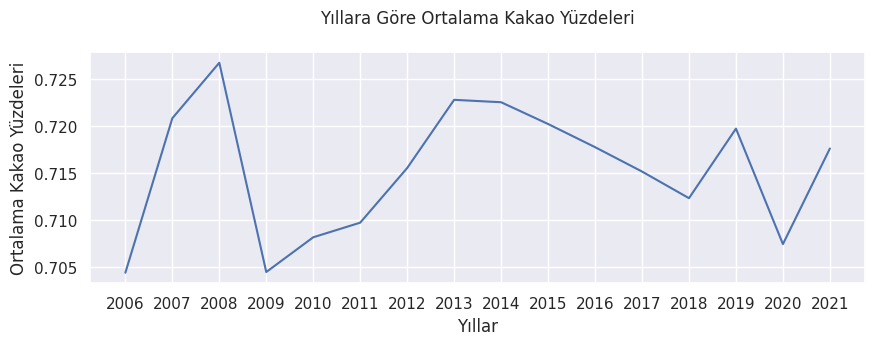

In [15]:
sns.set()
plt.figure(figsize=(10, 3))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=df_year_cocoa)
ax.set(xticks=df_year_cocoa.review_date.values)
plt.xlabel("Yıllar")
plt.ylabel("Ortalama Kakao Yüzdeleri")
plt.title("Yıllara Göre Ortalama Kakao Yüzdeleri\n")
plt.show()

**YILLARA GÖRE RATİNG DEĞERLERİNİN DEĞİŞİMİ**

In [16]:
df_year_rating = df.groupby('review_date').aggregate({'rating':'mean'}) 

In [17]:
df_year_rating=df_year_rating.reset_index()

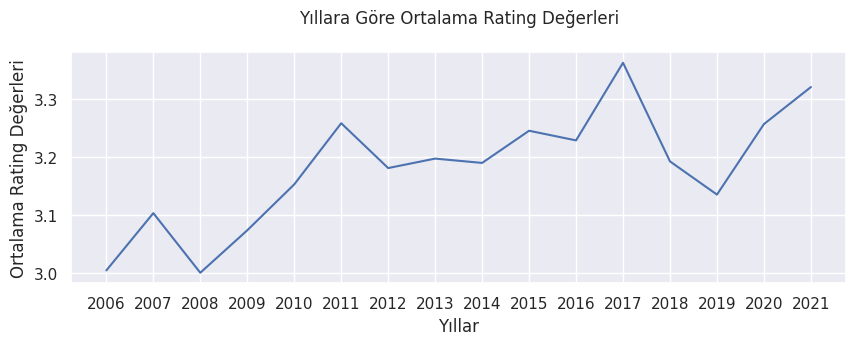

In [18]:
sns.set()
plt.figure(figsize=(10, 3))
ax = sns.lineplot(x='review_date', y='rating', data=df_year_rating)
ax.set(xticks=df_year_rating.review_date.values)
plt.xlabel("Yıllar")
plt.ylabel("Ortalama Rating Değerleri")
plt.title("Yıllara Göre Ortalama Rating Değerleri\n")
plt.show()

**KAKAO DEĞERLERİ VE RATİNG ARASINDAKİ İLİŞKİ**

Text(32.0, 0.5, 'Kakao Yüzdeleri')

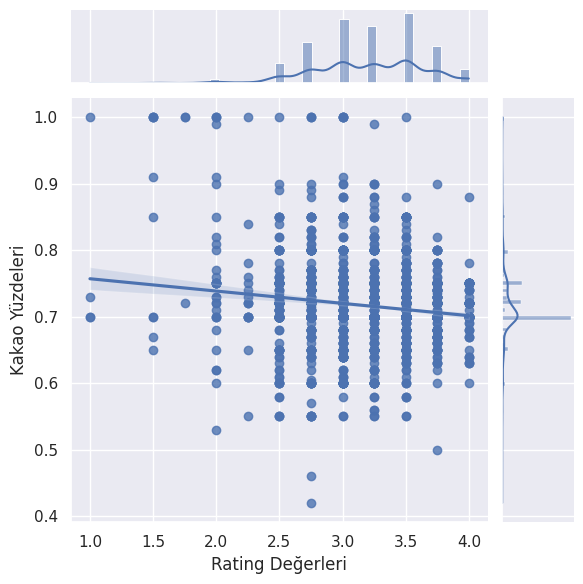

In [19]:
sns.jointplot(x = "rating", y = "cocoa_percent",
              kind = "reg", 
              data = df,
              palette='set2',
              dropna = True)
plt.xlabel("Rating Değerleri")
plt.ylabel("Kakao Yüzdeleri")


Text(0.5, 1.0, 'Yıllara Göre Kakao Yüzdeleri ve Rating Değerleri Arasındaki İlişki')

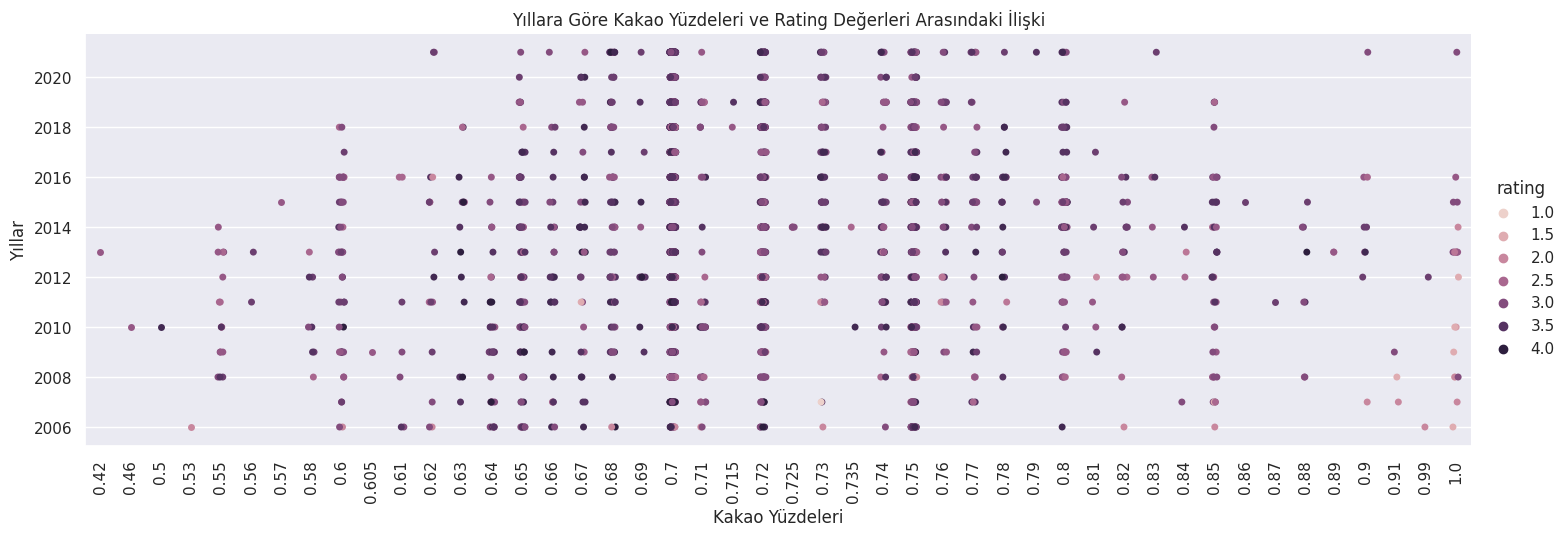

In [20]:
g = sns.catplot(x="cocoa_percent", y="review_date",
                hue="rating",aspect=3,
                data=df).set_xticklabels(rotation=90)
plt.xlabel("Kakao Yüzdeleri")
plt.ylabel("Yıllar")
plt.title("Yıllara Göre Kakao Yüzdeleri ve Rating Değerleri Arasındaki İlişki")

**RATİNG DEĞERLERİNE GÖRE ÇİKOLATALARIN KATEGORİLERE AYRILMASI**

In [35]:
tatmin_edici_olmayan= df[df['rating'] < 3.0]
tatmin_edici=df[(df['rating'] >= 3.0) & (df['rating'] < 4.0)]
çok_begenilen=df[df['rating'] >= 4.0]

In [36]:
baslık_isimleri= ['Tatmin Edici Olmayanlar', 'Tatmin Edici Olanlar','Çok Beğenilenler']

In [37]:
sizes = [tatmin_edici_olmayan.shape[0],tatmin_edici.shape[0],çok_begenilen.shape[0]]

In [90]:
colors = ['#FF0000','#FFFF00','#FFA500']

In [80]:
explode = (0.05,0.05,0.05) 

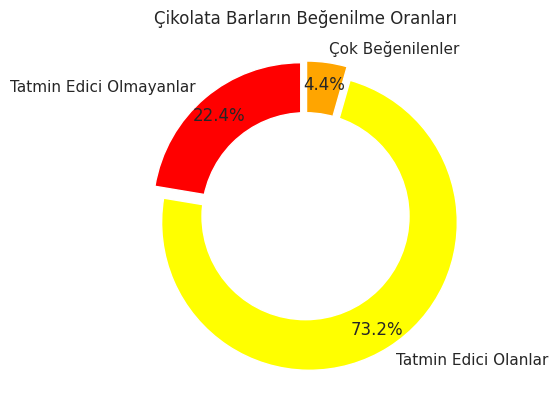

In [91]:
plt.pie(sizes, colors=colors, labels=baslık_isimleri,
        autopct='%1.1f%%', pctdistance=0.85,startangle=90,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Çikolata Barların Beğenilme Oranları')
plt.show()